In [1]:
from theano.sandbox import cuda

Using gpu device 0: Tesla K80 (CNMeM is disabled)


In [2]:
%matplotlib inline
import utils_modified; reload(utils_modified)
from utils_modified import *
from __future__ import division, print_function

Using Theano backend.


In [3]:
import numpy as np
import random
import sys

In [4]:
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, Embedding, Activation, LSTM, merge, Flatten, Dropout, Lambda
from keras.models import Model, Sequential
from keras.engine.topology import Merge
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD, RMSprop, Adam
from keras.layers.convolutional import *
from keras.utils.data_utils import get_file

In [5]:
# https://keras.io/getting-started/sequential-model-guide/

In [6]:
look_back = 5
model = Sequential()
model.add(LSTM(4, input_dim=look_back))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [7]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

train = [math.sin(x*0.2) for x in range(250*3)]
train = np.array(train).reshape(-1,1)
trainX, trainY = create_dataset(train, look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
#print(trainX, trainY)
model.fit(trainX, trainY, nb_epoch=100, batch_size=50, verbose=1)

Epoch 1/100
744/744 [==============================] - 0s - loss: 0.2771     
Epoch 2/100
744/744 [==============================] - 0s - loss: 0.2602     
Epoch 3/100
744/744 [==============================] - 0s - loss: 0.2449     
Epoch 4/100
744/744 [==============================] - 0s - loss: 0.2304     
Epoch 5/100
744/744 [==============================] - 0s - loss: 0.2170     
Epoch 6/100
744/744 [==============================] - 0s - loss: 0.2047     
Epoch 7/100
744/744 [==============================] - 0s - loss: 0.1932     
Epoch 8/100
744/744 [==============================] - 0s - loss: 0.1821     
Epoch 9/100
744/744 [==============================] - 0s - loss: 0.1721     
Epoch 10/100
744/744 [==============================] - 0s - loss: 0.1622     
Epoch 11/100
744/744 [==============================] - 0s - loss: 0.1530     
Epoch 12/100
744/744 [==============================] - 0s - loss: 0.1442     
Epoch 13/100
744/744 [==============================] - 0s - 

In [8]:
lag = look_back

In [9]:
def show_top_next(mdl, inp, steps=1):
    inp = np.copy(inp)
    for k in range(steps):
        #ps = mdl.predict([np.array([i]) for i in inp])
        ps = mdl.predict(inp)
        newimp = np.concatenate((inp[0,:,:],ps), axis=1)
        inp[0,:,:] = newimp[:,1:]
    return inp

In [10]:
cut = 10
inps = [trainX[10:(cut+1),:,:], ]
for iter in range(8):
    inps.append( show_top_next(model, inps[-1], 5) )

print(inps[0])
print(inps[1])
print(inps[2])

[[[ 0.90929743  0.8084964   0.67546318  0.51550137  0.33498815]]]
[[[ 0.15084174 -0.04886948 -0.25301829 -0.45148385 -0.63505036]]]
[[[-0.78937525 -0.90280908 -0.97273737 -0.99955636 -0.98406631]]]


In [11]:
TSmodel = np.concatenate(inps, axis=2)[0,0]
TSreal = trainX[range(cut,cut+5*8,5),:,:].reshape((1,1,-1))[0,0]

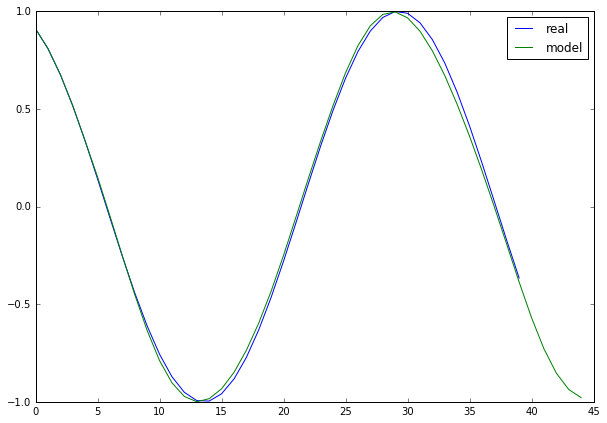

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(TSreal)
plt.plot(TSmodel)
plt.legend(['real','model'], loc='upper right')
plt.show()